In [1]:
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
#Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
chart_studio.tools.set_credentials_file(username='matth3w_D',api_key='hcLqTdvME7jzgmc6950A')

In [9]:
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
#from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
consumer_key = 'hLZaKzupS4csfHk2VrMd5ZHVt'
consumer_secret = 'FYMOASDOkSo9VSTDptlbHLRm2lNdbInrKneOdCj05LWV8nOW1p'
access_token = '1291617614851190794-o7NI5Zq26v4eqb9VTo561u67457w5q'
access_secret = 'M18KJPtIJg98aJi25AGfcesJtVeY7xuhIX8XuPgILhW7S'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [10]:
posts = api.user_timeline(screen_name='gvanrossum', count=10,lang="en",tweet_mode='extended')

print("show the 5 recent tweets: \n")
for tweet in posts[0:5]:
    print(tweet.full_text + '\n')
    

show the 5 recent tweets: 

@_DivyanshTiwari https://t.co/0pfoZvOy7Z

@prateekjha The student wins a prize for most unfortunate typo.

@dzsol @ramalhoorg @raymondh @ILevkivskyi @mariatta It's for typing only. The types module has really nothing to do with the typing module. (Agreed the names are confusingly close; it's too late to do anything about that now.)

My UNIX fu is waning. When playing around with the cherry-picker tool I naively typed `alias cp=cherry-picker`. Days later I got a mysterious error when trying to copy a directory. :-)

@emmayeboah_ @JackieKazil Less likely to stop functioning than a phone.



In [11]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,@_DivyanshTiwari https://t.co/0pfoZvOy7Z
1,@prateekjha The student wins a prize for most ...
2,@dzsol @ramalhoorg @raymondh @ILevkivskyi @mar...
3,My UNIX fu is waning. When playing around with...
4,@emmayeboah_ @JackieKazil Less likely to stop ...


In [12]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/S+', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,@_DivyanshTiwari https://t.co/0pfoZvOy7Z
1,The student wins a prize for most unfortunate...
2,It's for typing only. The types module ha...
3,My UNIX fu is waning. When playing around with...
4,_ Less likely to stop functioning than a phone.
5,A credit card?
6,Start by figuring out where they live using `...
7,: Thanks for maintaining autodoc and its ty...
8,This is the weirdest news of the week. https:/...
9,: And when you hit a ResolutionImpossible erro...


In [13]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df


,Tweets,Subjectivity,Polarity
0,@_DivyanshTiwari https://t.co/0pfoZvOy7Z,0.000000,0.000000
1,The student wins a prize for most unfortunate...,0.566667,0.100000
2,It's for typing only. The types module ha...,0.550000,-0.100000
3,My UNIX fu is waning. When playing around with...,0.750000,0.050000
4,_ Less likely to stop functioning than a phone.,0.533333,-0.083333
5,A credit card?,0.000000,0.000000
6,Start by figuring out where they live using `...,0.750000,-0.181818
7,: Thanks for maintaining autodoc and its ty...,0.200000,0.250000
8,This is the weirdest news of the week. https:/...,0.000000,0.000000
9,: And when you hit a ResolutionImpossible erro...,0.500000,0.500000


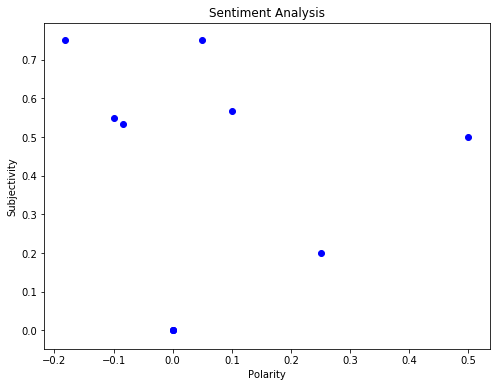

In [14]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
#For the most basic graph, all we need is the x and y values:
twitter_data = go.Scatter(x=df.values, y=df.index)

#Then, we create a layout using the default settings along with some titles:
layout = go.Layout(title='Plot', xaxis=dict(title='Date'), yaxis=dict(title='kwh'))

#Finally, we can create our figure and display it interactively in the notebook:
fig = go.Figure(data=[twitter_data], layout=layout)
py.iplot(fig, sharing='public')